Necessary Imports

In [2]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 4.9 MB/s 
     |████████████████████████████████| 25.8 MB 19.9 MB/s 
     |████████████████████████████████| 325 kB 52.8 MB/s 
     |████████████████████████████████| 3.3 MB 35.3 MB/s 
     |████████████████████████████████| 88 kB 3.6 MB/s 
     |████████████████████████████████| 662 kB 47.9 MB/s 
     |████████████████████████████████| 141 kB 30.7 MB/s 
     |████████████████████████████████| 5.0 MB 46.3 MB/s 
     |████████████████████████████████| 1.3 MB 22.6 MB/s 
     |████████████████████████████████| 56 kB 695 kB/s 
     |████████████████████████████████| 167 kB 42.2 MB/s 
     |████████████████████████████████| 1.7 MB 50.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 

In [ ]:
# pip install --upgrade numpy

In [3]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from pycaret.utils import version
version()

'2.3.10'

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os


from google.colab import files                        #import of files from local disk
import io
from pycaret.nlp import *


In [6]:
import warnings
warnings.filterwarnings(action='ignore')

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [7]:
import spacy.cli
spacy.cli.download("en_core_web_sm")
spacy.__version__
nlp = spacy.load('en_core_web_sm')

⚠ Skipping model package dependencies and setting `--no-deps`. You
don't seem to have the spaCy package itself installed (maybe because you've
built from source?), so installing the model dependencies would cause spaCy to
be downloaded, which probably isn't what you want. If the model package has
other dependencies, you'll have to install them manually.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [8]:
data = files.upload()           #uploading csv files
%matplotlib inline

Saving Product Review Large Data.csv to Product Review Large Data.csv


In [9]:
df = pd.read_csv(io.StringIO(data['Product Review Large Data.csv'].decode('utf-8')))   

In [10]:
# data_df = df[['reviews.rating', 'reviews.text']]
# data_df.shape 
data_df = df
data_df.shape
dx = data_df[['reviews.rating']]
dx.head()

,reviews.rating
0,5.0
1,5.0
2,4.0
3,5.0
4,5.0


0 -> Positive Review    1 -> Negative Review
Review rating > 3 is considered Postive

In [11]:
m = data_df['reviews.rating'].mean()
data_df['reviews.rating'].fillna(value=m, inplace= True)
data_df['reviews.rating'] = data_df['reviews.rating'].astype(float).round(0)
# data_df.head()
# #0 -> positive, 1-> negative

def review_rr(val):
  if val > 3:
    return 0
  else:
    return 1

data_df['reviews.class']= data_df['reviews.rating'].map(review_rr)
dd = pd.DataFrame()
dd = data_df[['reviews.rating', 'reviews.text', 'reviews.class']]
display(dd.head())
dd.info()
data = dd['reviews.text'].values
target = dd['reviews.class'].values




,reviews.rating,reviews.text,reviews.class
0,5.0,I initially had trouble deciding between the p...,0
1,5.0,Allow me to preface this with a little history...,0
2,4.0,I am enjoying it so far. Great for reading. Ha...,0
3,5.0,I bought one of the first Paperwhites and have...,0
4,5.0,I have to say upfront - I don't like coroporat...,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10971 entries, 0 to 10970
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.rating  10971 non-null  float64
 1   reviews.text    10971 non-null  object 
 2   reviews.class   10971 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 257.3+ KB


In [12]:
val = dd['reviews.class'].value_counts()
print(val)
print("0-> Postive Review, 1-> Negative Review")

0    8751
1    2220
Name: reviews.class, dtype: int64
0-> Postive Review, 1-> Negative Review


SETUP function Pycaret

In [13]:

review_nlp = setup(dd, target = 'reviews.text', session_id = 123)

Description,Value
session_id,123
Documents,10971
Vocab Size,7282
Custom Stopwords,False


INFO:logs:setup() succesfully completed......................................


In [14]:
lda = create_model('lda', multi_core=True)

INFO:logs:LdaModel(num_terms=7282, num_topics=4, decay=0.5, chunksize=100)
INFO:logs:create_model() succesfully completed......................................


In [16]:
# print(lda)

Model Creation and Assignment 

In [17]:

lda_df = assign_model(lda)

INFO:logs:(10971, 9)
INFO:logs:assign_model() succesfully completed......................................


In [18]:
lda_df.head()

,reviews.rating,reviews.text,reviews.class,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,5.0,initially trouble decide paperwhite voyage rev...,0,0.003055,0.296289,0.020483,0.680173,Topic 3,0.68
1,5.0,allow preface little history casual reader noo...,0,0.062510,0.720733,0.022260,0.194497,Topic 1,0.72
2,4.0,enjoy far great read original fire fire use ma...,0,0.126021,0.814385,0.015281,0.044312,Topic 1,0.81
3,5.0,buy first paperwhite please constant companion...,0,0.002204,0.586369,0.041005,0.370422,Topic 1,0.59
4,5.0,say coroporate hermetically close stuff case d...,0,0.002044,0.457761,0.002062,0.538134,Topic 3,0.54


Plots

In [19]:
plot_model(lda, plot = 'topic_model')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=LdaModel(num_terms=7282, num_topics=4, decay=0.5, chunksize=100), plot=topic_model, topic_num=None, save=False, system=True)
INFO:logs:Topic selected. topic_num : Topic 0
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: topic_model
INFO:logs:Preparing pyLDAvis visual


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.234317  0.143632       1        1  35.166287
3      0.055163 -0.168276       2        1  24.102360
1     -0.196089 -0.151771       3        1  22.868622
0     -0.093391  0.176415       4        1  17.862731, topic_info=         Term         Freq        Total Category  logprob  loglift
187      good  7855.000000  7855.000000  Default  30.0000  30.0000
558   quality  3767.000000  3767.000000  Default  29.0000  29.0000
928     sound  4059.000000  4059.000000  Default  28.0000  28.0000
553   product  4201.000000  4201.000000  Default  27.0000  27.0000
3248     bass  2279.000000  2279.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
220     would   228.246241   762.787303   Topic4  -4.9736   0.5159
10        day   226.240989   780.158943   Topic4  -4.9824   0.4846
187      good   346.568431  7855.203115   Topic4  -4.5560  -1.3984
1        also   241.353204  1512.076667   Topic4  -4.9178  -0.1125
57       time   219.678612  1019.072523   Topic4  -5.0119   0.1880

[291 rows x 6 columns], token_table=      Topic      Freq                             Term
term                                                  
4296      2  0.039006  address_three_biggest_complaint
4296      3  0.039006  address_three_biggest_complaint
4296      4  0.936149  address_three_biggest_complaint
4589      2  0.014682                          airdope
4589      3  0.014682                          airdope
...     ...       ...                              ...
220       2  0.407715                            would
220       3  0.247775                            would
220       4  0.298904                            would
133       2  0.182288                             year
133       3  0.816971                             year

[689 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=LdaModel(num_terms=7282, num_topics=4, decay=0.5, chunksize=100), plot=wordcloud, topic_num=None, save=False, system=True)
INFO:logs:Topic selected. topic_num : Topic 0
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: wordcloud
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=LdaModel(num_terms=7282, num_topics=4, decay=0.5, chunksize=100), verbose=False)
INFO:logs:Determining model type
INFO:logs:model type: lda
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:(10971, 9)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Fitting WordCloud()
INFO:logs:Rendering Visual


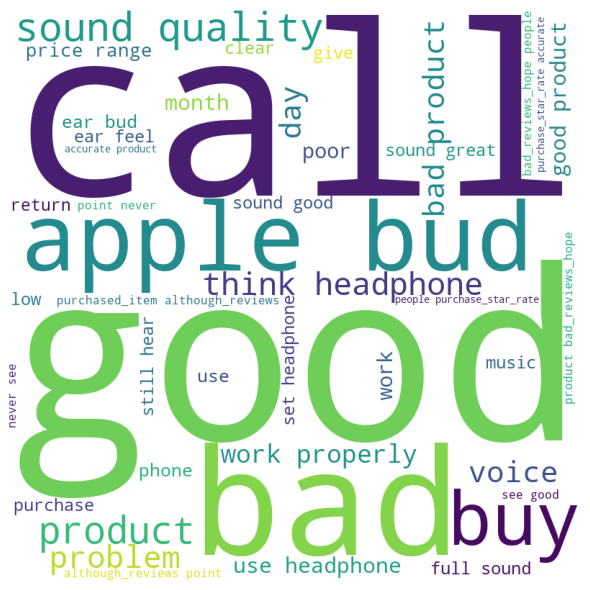

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [20]:
plot_model(lda, plot = 'wordcloud')

In [21]:
lda_df.head()

,reviews.rating,reviews.text,reviews.class,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,5.0,initially trouble decide paperwhite voyage rev...,0,0.003055,0.296289,0.020483,0.680173,Topic 3,0.68
1,5.0,allow preface little history casual reader noo...,0,0.062510,0.720733,0.022260,0.194497,Topic 1,0.72
2,4.0,enjoy far great read original fire fire use ma...,0,0.126021,0.814385,0.015281,0.044312,Topic 1,0.81
3,5.0,buy first paperwhite please constant companion...,0,0.002204,0.586369,0.041005,0.370422,Topic 1,0.59
4,5.0,say coroporate hermetically close stuff case d...,0,0.002044,0.457761,0.002062,0.538134,Topic 3,0.54


In [22]:
lda_df.drop(["reviews.rating", "reviews.text"], axis = 1, inplace= True)

In [23]:
!pip install numba==0.53
!pip install numba --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 7.3 MB/s 
     |████████████████████████████████| 25.3 MB 1.2 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.5 MB 7.5 MB/s 
     |████████████████████████████████| 34.6 MB 1.2 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.36.0
    Uninstalling llvmlite-0.36.0:
      Successfully uninstalled llvmlite-0.36.0
  Attempting uninstall: numba
    Found existing installation: numba 0.53.0
    Uninstalling nu

SETUP function again with updated words and tokens

In [24]:
from pycaret.classification import *
setup(data = lda_df, 
      target = 'reviews.class')

,Description,Value
0,session_id,2067
1,Target,reviews.class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10971, 7)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='reviews.class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeri...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'p

(Pipeline(memory=None, steps=[('empty_step', 'passthrough')], verbose=False),
 'box-cox',
         Topic_0   Topic_1   Topic_2   Topic_3  Perc_Dominant_Topic  \
 2285   0.036781  0.036606  0.890236  0.036376                 0.89   
 2473   0.250000  0.250000  0.250000  0.250000                 0.25   
 4629   0.189015  0.007089  0.796829  0.007067                 0.80   
 6491   0.023144  0.022848  0.930940  0.023068                 0.93   
 7387   0.448876  0.008295  0.352059  0.190771                 0.45   
 ...         ...       ...       ...       ...                  ...   
 10658  0.055190  0.050370  0.317696  0.576743                 0.58   
 6056   0.083454  0.096362  0.729886  0.090297                 0.73   
 4357   0.085073  0.083460  0.747897  0.083570                 0.75   
 3862   0.059059  0.007103  0.926372  0.007466                 0.93   
 1164   0.022798  0.023762  0.024240  0.929200                 0.93   
 
        Dominant_Topic_Topic 0  Dominant_Topic_Topic 1  

Model Comparision

In [25]:
compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8653,0.8406,0.5403,0.7297,0.6200,0.5405,0.5500,1.596
gbc,Gradient Boosting Classifier,0.8622,0.8374,0.4930,0.7459,0.5929,0.5142,0.5305,1.025
lightgbm,Light Gradient Boosting Machine,0.8596,0.8404,0.4884,0.7346,0.5861,0.5057,0.5213,0.211
ada,Ada Boost Classifier,0.8561,0.8285,0.4872,0.7192,0.5797,0.4967,0.5112,0.401
et,Extra Trees Classifier,0.8505,0.8354,0.5332,0.6674,0.5920,0.5020,0.5072,0.612
ridge,Ridge Classifier,0.8499,0.0000,0.4430,0.7106,0.5450,0.4611,0.4799,0.025
lr,Logistic Regression,0.8496,0.8173,0.4482,0.7068,0.5478,0.4631,0.4807,0.268
lda,Linear Discriminant Analysis,0.8495,0.8157,0.4910,0.6814,0.5703,0.4820,0.4918,0.025
svm,SVM - Linear Kernel,0.8484,0.0000,0.4520,0.6980,0.5464,0.4609,0.4776,0.045
knn,K Neighbors Classifier,0.8482,0.8029,0.4846,0.6812,0.5655,0.4767,0.4873,0.266


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2067, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2067, verbose=0,
                       warm_start=False)

Let us try traditional Models

Naive Bayes

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_val, y_train, y_val = train_test_split(data, target, test_size = 0.2, stratify = target )
X_val, X_test , y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5, stratify = y_val)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer                   #for comparision with Naive Bayes Library
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

In [28]:
nb = make_pipeline(TfidfVectorizer(), MultinomialNB())
nb.fit(X_train, y_train)
preds_new = nb.predict(X_val)
acc_nb = accuracy_score(preds_new , y_val )
print(acc_nb)

0.8368277119416591


Random Forest Classifier

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
vectorizer_rfc = CountVectorizer(min_df=1)
X = vectorizer_rfc.fit_transform(X_train).toarray()

In [30]:
clf = RandomForestClassifier()
clf.fit(X, y_train)
pred = clf.predict(vectorizer_rfc.transform(X_val).toarray())

In [31]:
acc_rf = accuracy_score(pred, y_val)
print(acc_rf)

0.9161349134001823


SVM

In [32]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
import re
import time

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [33]:
def data_preprocessing(X_train):
  lemma = WordNetLemmatizer()
  swords = stopwords.words("english")
  X=[]
  for text in X_train:
      
      # Cleaning links
      text = re.sub(r'http\S+', '', text)
      
      # Cleaning everything except alphabetical and numerical characters
      text = re.sub("[^a-zA-Z0-9]"," ",text)
      
      # Tokenizing and lemmatizing
      text = nltk.word_tokenize(text.lower())
      text = [lemma.lemmatize(word) for word in text]
      
      # Removing stopwords
      text = [word for word in text if word not in swords]
      
      # Joining
      text = " ".join(text)
      
      X.append(text)
  return X

In [34]:
X = data_preprocessing(X_train)
vectorizer = CountVectorizer(max_features=10000)
BOW = vectorizer.fit_transform(X)
Xtrain, Xtest, ytrain, ytest = train_test_split(BOW, y_train) 

In [35]:
from sklearn.svm import SVC

model = SVC()
model.fit(Xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
preds = model.predict(Xtest)
acc_svm = accuracy_score(ytest,preds)
print(acc_svm)

0.8710118505013673


Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline

In [38]:
model = LogisticRegression()
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', LogisticRegression(random_state=0))])

model_lr = pipeline.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)
acc_lr = accuracy_score(pred_lr, y_test)
print(acc_lr)

0.8943533697632058


In [39]:
X_test.shape

(1098,)

Plot Accuracies

<BarContainer object of 4 artists>

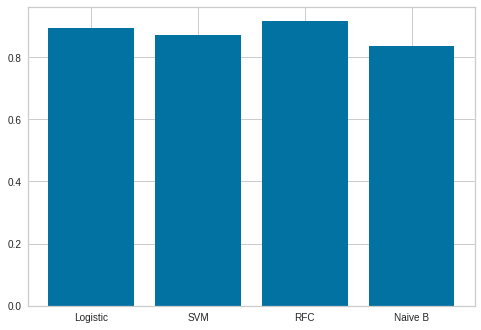

In [40]:
Names = ['Logistic', 'SVM', 'RFC', 'Naive B']
H = [acc_lr, acc_svm, acc_rf, acc_nb]
plt.bar(Names, H)

Testing using Random Forest

In [41]:
final_preds = clf.predict(vectorizer_rfc.transform(X_test).toarray())
acc_rf = accuracy_score(final_preds, y_test)
print(acc_rf)


0.9216757741347905


In [42]:
for i in range(5):
  print(X_test[i], "\n", final_preds[i])


An excellent one..am using this for my realme 3pro...and it work perfectly (in gaming also *pubg).batteey backup is excellent...and the warp charge support is also amazing. 
 0
Don't buy it from Flipkart they send me wrong product and then they declined my refund request 2 time ..... frauds don't waste ur money 
 1
Best Wired Headphones I ever used. Boat has surprised by it's sound quality. Excellent product, Beautiful Hawk design. If you are planning to purchase don't think, just go for it. 
 0
Best Bluetooth wireless headphones..# 
 0
I love the bass the most but there is an issue it automatically turns off while listening songs which is really disgusting 
 0
